In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob
sns.set()

In [2]:
ABS_PATH = "../../data/imdb/"

# reading all the annotations

In [3]:
annotations = [i for i in os.listdir(ABS_PATH) if i.endswith('csv')]

In [4]:
annotations

['annotations_1.csv',
 'annotations_Tar2.csv',
 'annotations_olek.csv',
 'annotations_2.csv',
 'annotations.csv',
 'annotations_mal.csv']

In [5]:
df = pd.DataFrame()
for path in annotations:
    df = pd.concat([df, pd.read_csv(os.path.join(ABS_PATH,path))], axis=0)

In [6]:
df.drop_duplicates(subset=['image_name'], inplace=True)

In [7]:
df = df.drop(columns=df.columns[-1]).dropna(how='any')

# analysis

In [8]:
df.shape

(1717, 2)

In [9]:
df['image_name'].nunique()

1717

In [10]:
annotations = df['annotation'].values

In [11]:
def count_unique(annotations):
    tokens, counts = np.unique(np.hstack([i.split(' ') for i in annotations]), return_counts=True)
    count_tuple = sorted(list(zip(tokens, counts)),key= lambda x: x[1])[::-1]
    return count_tuple

In [12]:
def plot_barh(entity, title=''):
    keys, values = zip(*entity[::-1])
    plt.figure(figsize=(14,12))
    plt.barh(range(len(values)), values)
    plt.yticks(range(len(values)), keys)
    plt.title(title)

In [13]:
count_tuple = count_unique([i.lower() for i in annotations])

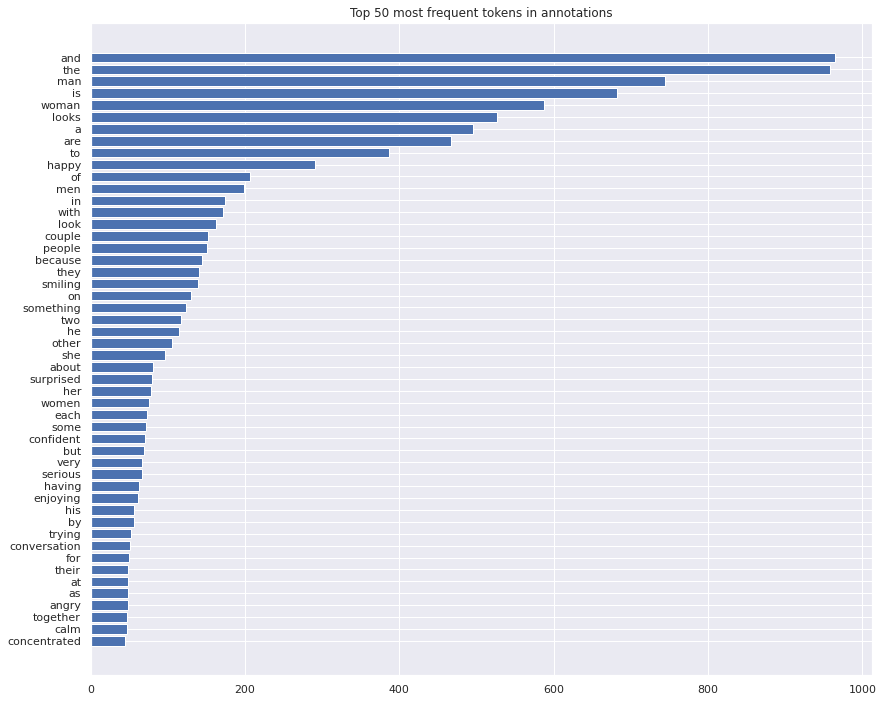

In [14]:
plot_barh(count_tuple[:50], 'Top 50 most frequent tokens in annotations')

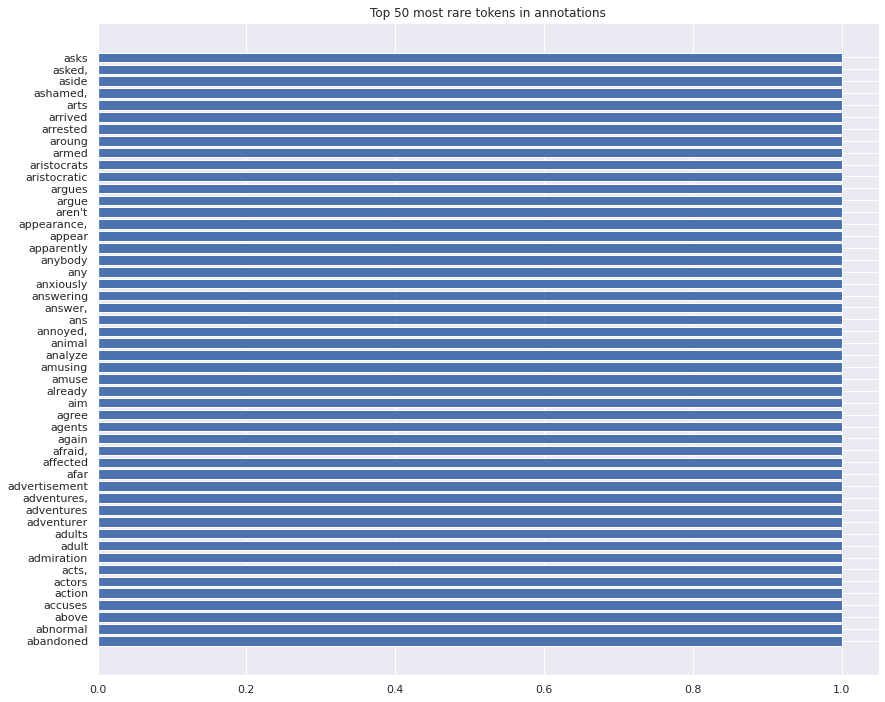

In [15]:
plot_barh(count_tuple[-50:], 'Top 50 most rare tokens in annotations')

In [16]:
len(count_tuple)

1655

In [17]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [18]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
def stem(annotations):
    stemmer = PorterStemmer()
    stemmed_result = []
    stemmed_dict = {}
    for i in annotations:
        tmp = []
        for z in i.split(' '):
            tmp_stemmed = stemmer.stem(z)
            stemmed_dict.update({z:tmp_stemmed})
            tmp.append(tmp_stemmed)
        stemmed_result.append(' '.join(tmp))
    return stemmed_result, stemmed_dict

In [20]:
stemmed,stemmed_dict = stem(annotations)

In [21]:
unique_stemmed  = count_unique(stemmed)

In [22]:
len(unique_stemmed)

1342

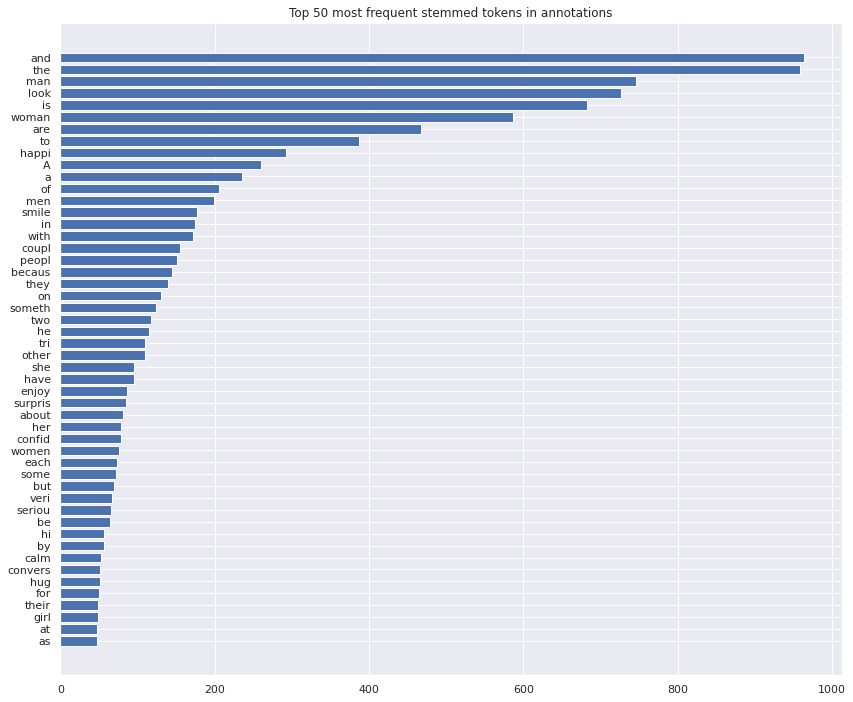

In [23]:
plot_barh(unique_stemmed[:50], 'Top 50 most frequent stemmed tokens in annotations')

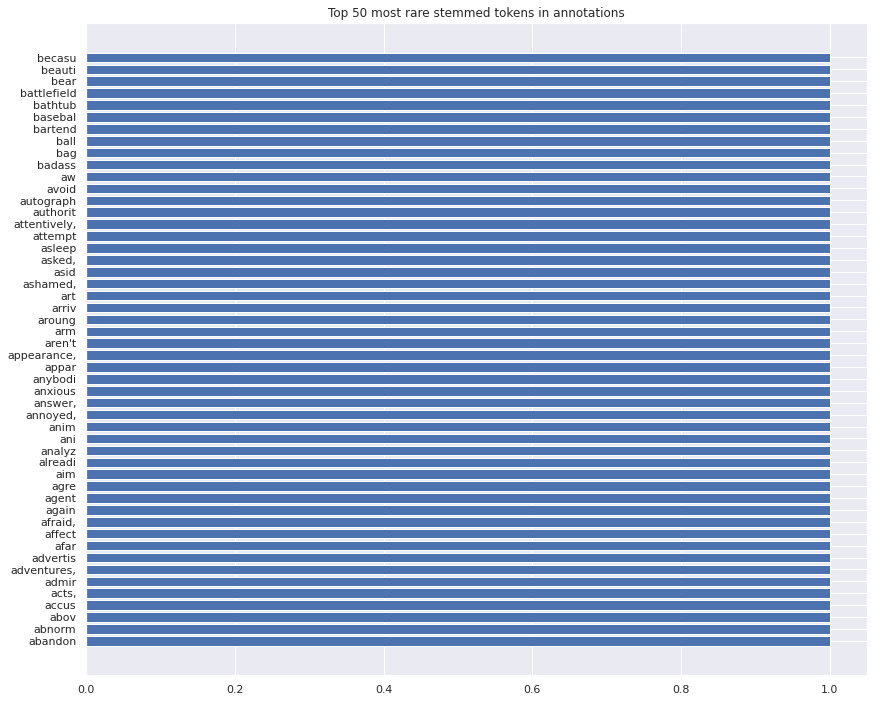

In [24]:
plot_barh(unique_stemmed[-50:], 'Top 50 most rare stemmed tokens in annotations')

# analysis in terms of sentiment

In [25]:
# import SentimentIntensityAnalyzer class 
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
    sid_obj = SentimentIntensityAnalyzer() 
    compounds = dict([(i,sid_obj.polarity_scores(i)['compound']) for i in sentence.split(' ') if sid_obj.polarity_scores(i)['compound']!=0])
    compound_score = sid_obj.polarity_scores(sentence)['compound']
    if compound_score >= 0.05 : 
        sentiment = "Positive"
  
    elif compound_score <= - 0.05 : 
        sentiment = "Negative" 
  
    else : 
        sentiment =  "Neutral" 
    return sentiment, compounds

In [26]:
sentiments = []
for i in  annotations:
    sentiments.append(sentiment_scores(i))

In [27]:
sentiment, words_compound = zip(*sentiments)

In [28]:
labels, sizes = zip(*count_unique(sentiment))

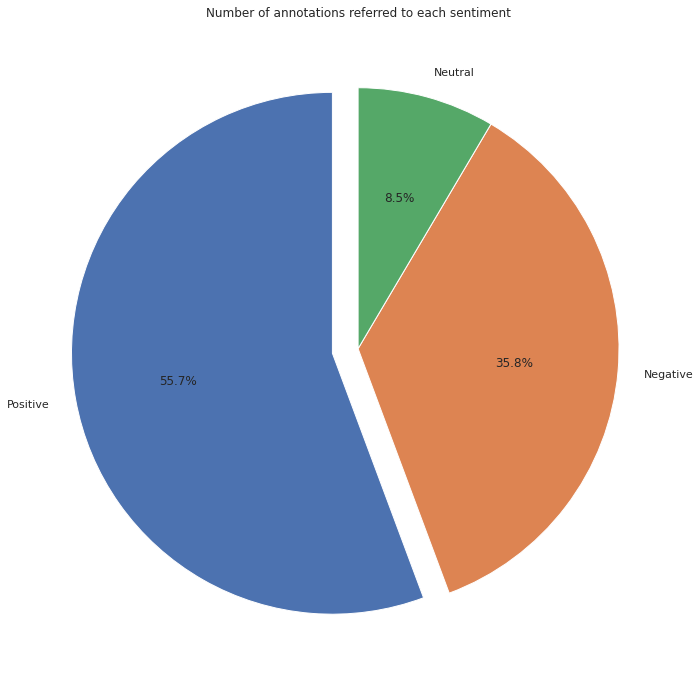

In [29]:
plt.figure(figsize=(14,12))
plt.pie(sizes, labels=labels, explode=(0.1,0,0),startangle=90,
       autopct='%1.1f%%')
plt.title('Number of annotations referred to each sentiment');

In [30]:
sentiment = np.array(sentiment)
annotations = np.array(annotations)
idx_neg = np.random.choice(np.where(sentiment=='Negative')[0], 1)
idx_pos = np.random.choice(np.where(sentiment=='Positive')[0], 1)
idx_neu = np.random.choice(np.where(sentiment=='Neutral')[0], 1)
print('Positive sentence example : {}'.format(annotations[idx_pos][0]))
print('Negative sentence example : {}'.format(annotations[idx_neg][0]))
print('Neutral sentence example : {}'.format(annotations[idx_neu][0]))

Positive sentence example : Two women are having a nice time together
Negative sentence example : The very dangerous woman is performing on the stage
Neutral sentence example : The man is dancing with the woman


# visualizing annotations

In [31]:
from PIL import Image

In [32]:
directories = [i for i in os.listdir(ABS_PATH) if not i.endswith('csv')]

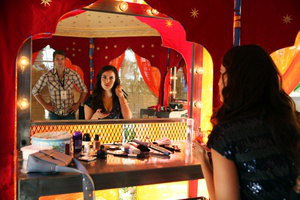

The calm man is looking at the girl doing makeup


In [50]:
idx = np.random.choice(df.index,1)[0]
sampled = df.iloc[idx]
for directory in directories:
    path = os.path.join(ABS_PATH,directory)
    files = os.listdir(path)
    image = sampled['image_name']
    if image in files:
        display(Image.open(os.path.join(path, image)))
        print(sampled['annotation'])